In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

DATA = os.path.join('..','..','data','Events','MtBaker_50km_radius_origins.csv')


# PNSN Catalog Exploration
Use this notebook to explore and visualize PNSN seismic catalog statistics for events within 50 km of the summit of Mt. Baker.  

Guiding questions:  
1) What is the distribution of event types for events within 20 km of Mt. Baker?
2) Are there trends between source properties of these events? E.g., magnitude, depth, origin time.
3) 

In [2]:
# Load CSV output from PostgreSQL query on `archdb`
df = pd.read_csv(DATA)
# Fix Header Name
df = df.rename(columns={'to_timestamp': 'origin_time'})
# Convert timestamps from string to pandas Timestamp and shift from local time to UTC
df.origin_time = df.origin_time.apply(lambda x: pd.Timestamp(x).tz_convert(None))
# One-Hot encode etype
ohe = dict(zip(df['etype'].unique(), range(len(df['etype'].unique()))))
df = df.assign(etype_code=[ohe[x] for x in df.etype])
# Show the result
display(df)

,evid,etype,selectflag,version,commid,remark,magid,magnitude,magtype,uncertainty,...,maglarge,azilarge,diplarge,maginter,aziinter,dipinter,magsmall,azismall,dipsmall,etype_code
0,10835408,uk,1,2,1033213.0,elin),899628.0,3.40,d,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,10835408,uk,1,2,1033213.0,ML from Seattle and Newport (Yelin).,899628.0,3.40,d,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,10835408,uk,1,2,1033213.0,DNAG card: ISC 1969 6112145 8.00 48.800-12...,899628.0,3.40,d,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10835408,uk,1,2,1033213.0,UW2 Q1=- Q2=-,899628.0,3.40,d,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,10835518,uk,1,2,1033323.0,.00 0,899738.0,2.50,d,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8289,62047166,px,1,2,2116323.0,Canada blast,3308148.0,0.99,l,0.147649,...,31.61,0.0,90.0,2.11,245.0,0.0,1.67,NaN,NaN,2
8290,62047231,px,1,2,2116268.0,Canada blast,3308003.0,0.96,l,0.184382,...,31.61,0.0,90.0,3.84,153.0,0.0,0.81,NaN,NaN,2
8291,62047526,px,1,3,2116458.0,Canada Blast,3308638.0,0.67,d,0.007545,...,31.61,0.0,90.0,0.93,168.0,0.0,0.44,NaN,NaN,2
8292,62048201,px,1,3,2116473.0,Canada,NaN,NaN,NaN,NaN,...,31.61,0.0,90.0,1.56,169.0,0.0,0.60,NaN,NaN,2


etype  etype_code
eq     1             7100
ex     4               21
lf     3              481
px     2              633
su     5               41
uk     0               18
Name: count, dtype: int64

/Users/nates/miniconda3/envs/baker_dlp/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


ValueError: 'spectral' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

/Users/nates/miniconda3/envs/baker_dlp/lib/python3.10/site-packages/matplotlib/collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 640x480 with 0 Axes>

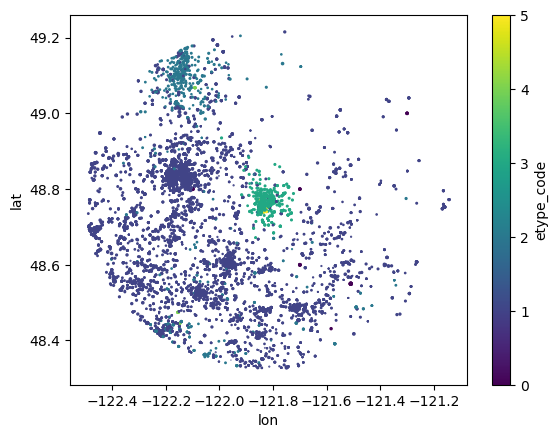

<Figure size 640x480 with 0 Axes>

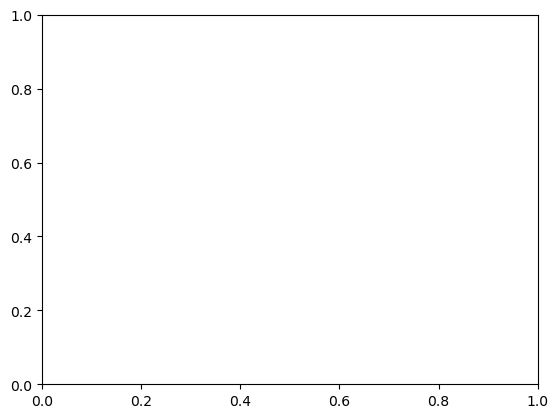

In [3]:
display(df[['etype','etype_code']].value_counts().sort_index())
fig = plt.figure()
df.plot.scatter('lon','lat',s='magnitude', c='etype_code', colormap='viridis')
plt.figure()
df.plot.scatter('lon','depth',s='magnitude', c='etype_code', colormap='spectral')
plt.ylim([40,-5])

21

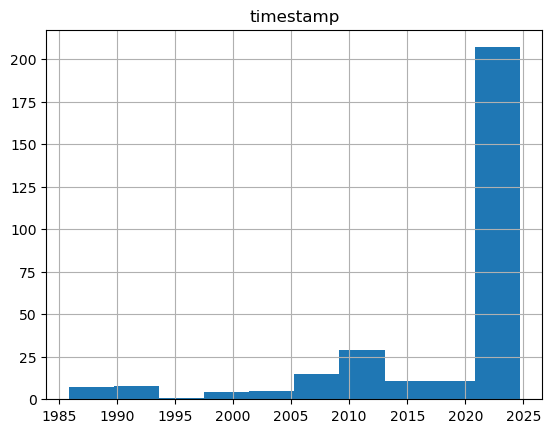

In [30]:
df[df.etype=='lf'].hist('timestamp')
# plt.ylim([40, -5])
display(len(df[(df.etype=='lf') & (df.timestamp > pd.Timestamp('2009-01-01')) & (df.depth > 10)]))